# **$\color{red}{\text{Data Visualization of Bird Strikes between 2000 – 2011}}$**

## Problem Statement:

Transport and communication are in the crucial domain in the field of analytics.
Environmental impacts and safety are, nowadays, two major concerns of the scientific
community with respect to transport scenarios and to the ever-growing urban areas.
These issues gain more importance due to the increasing amount of vehicles and
people. Seeking new solutions is reaching a point where available technologies and
artificial intelligence, especially MAS, are being recognized as ways to cope with and
tackle these kinds of problems in a distributed and more appropriate way.


A bird strike is strictly defined as a collision between a bird and an aircraft which is in
flight or on a take-off or landing roll. The term is often expanded to cover other wildlife
strikes - with bats or ground animals. Bird Strike is common and can be a significant
threat to aircraft safety. For smaller aircraft, significant damage may be caused to the
aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss
of thrust which can follow the ingestion of birds into engine air intakes. This has
resulted in several fatal accidents.


Bird strikes may occur during any phase of flight, but are most likely during the
take-off, initial climb, approach and landing phases due to the greater numbers of birds
in flight at lower levels. To have a closer look the following document visually depicts
the data collected on Bird Strikes by FAA between 2000-2011.

In [45]:
# Load "numpy" and "pandas" for manipulating numbers and dataframes
# Load "matplotlib.pyplot" and "seaborn" for data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Read in the "Bird Strikes data" file as a Pandas DataFrame
data = pd.read_excel('Bird Strikes data.xlsx')

In [47]:
# looking dataset in beirf
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,No Impact,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,No Impact,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,No Impact,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [48]:
# Get the dimensions of the dataset
data.shape

(25558, 26)

In [49]:
# Extracting all the column names from the dataset
data.columns.to_list()

['Record ID',
 'Aircraft: Type',
 'Airport: Name',
 'Altitude bin',
 'Aircraft: Make/Model',
 'Wildlife: Number struck',
 'Wildlife: Number Struck Actual',
 'Effect: Impact to flight',
 'FlightDate',
 'Effect: Indicated Damage',
 'Aircraft: Number of engines?',
 'Aircraft: Airline/Operator',
 'Origin State',
 'When: Phase of flight',
 'Conditions: Precipitation',
 'Remains of wildlife collected?',
 'Remains of wildlife sent to Smithsonian',
 'Remarks',
 'Wildlife: Size',
 'Conditions: Sky',
 'Wildlife: Species',
 'Pilot warned of birds or wildlife?',
 'Cost: Total $',
 'Feet above ground',
 'Number of people injured',
 'Is Aircraft Large?']

In [50]:
# looking at basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [51]:
# Checking the null or blank values in the dataset
data.isnull().sum()

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

In [52]:
data['Remarks'].fillna('No Remark', inplace = True)

In [53]:
data.isnull().sum()

Record ID                                    0
Aircraft: Type                             129
Airport: Name                              129
Altitude bin                               129
Aircraft: Make/Model                         0
Wildlife: Number struck                    129
Wildlife: Number Struck Actual               0
Effect: Impact to flight                   129
FlightDate                                 129
Effect: Indicated Damage                     0
Aircraft: Number of engines?               267
Aircraft: Airline/Operator                 129
Origin State                               449
When: Phase of flight                      129
Conditions: Precipitation                    0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Remarks                                      0
Wildlife: Size                             129
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned 

In [54]:
# removing the null or blank values form the dataset
data1 = data.dropna()

In [55]:
# Rechecking the null valeus in the dataset
data1.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [56]:
data1.shape

(24747, 26)

In [57]:
# looking at the basic statistics of the dataset

data1.describe(include = 'all')

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
count,24747.000000,24747,24747,24747,24747,24747.0,24747.000000,24747,24747,24747,...,24747,24747,24747,24747,24747,24747,2.474700e+04,24747.000000,24747.000000,24747
unique,NaN,1,976,2,279,4.0,NaN,5,NaN,2,...,2,17630,3,3,340,2,NaN,NaN,NaN,2
top,NaN,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,B-737-700,1.0,NaN,No Impact,NaN,No damage,...,False,No Remark,Small,No Cloud,Unknown bird - small,N,NaN,NaN,NaN,No
freq,NaN,24747,802,19977,2486,20222.0,NaN,22752,NaN,22363,...,22855,4605,17001,12213,10146,14092,NaN,NaN,NaN,16569
mean,254485.775165,NaN,NaN,NaN,NaN,NaN,2.689255,NaN,2007-01-23 03:03:49.118680832,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.485157e+03,801.538449,0.000849,NaN
min,200011.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2000-01-02 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN
25%,225827.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2004-06-21 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN
50%,248552.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2007-07-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,50.000000,0.000000,NaN
75%,268974.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2009-10-31 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,700.000000,0.000000,NaN
max,321909.000000,NaN,NaN,NaN,NaN,NaN,942.000000,NaN,2011-12-31 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.239775e+07,18000.000000,6.000000,NaN


In [58]:
# Checking the duplicate data
data1.duplicated().sum()

0

# Visualization

**Visuals Depicting the number of Bird Strikes.**

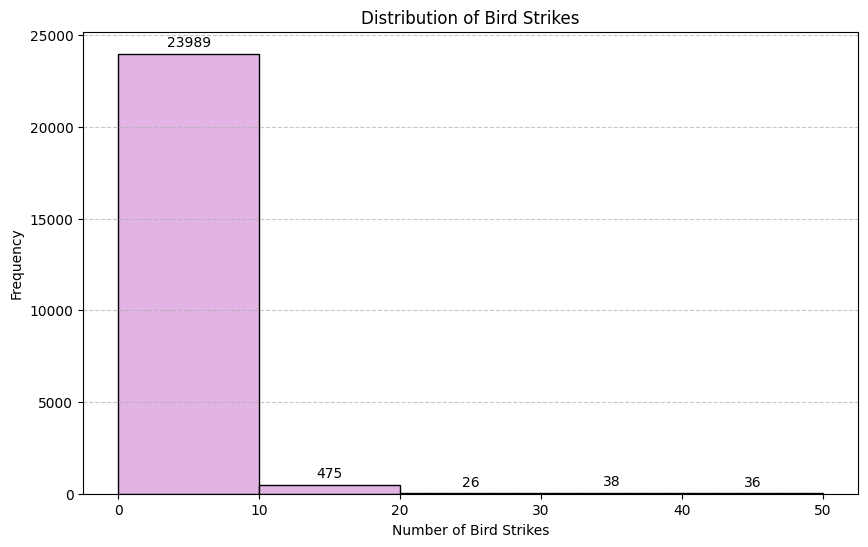

In [128]:
# Create bins for the strikes
bins = [0, 10, 20, 30, 40, 50]

plt.figure(figsize=(10, 6))
hist = sns.histplot(data=data1, x='Wildlife: Number Struck Actual', bins=bins, color='plum', edgecolor='black', alpha=0.8)

# Add value labels to each bar
for p in hist.patches:
    height = p.get_height()
    plt.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

plt.xlabel('Number of Bird Strikes')
plt.ylabel('Frequency')
plt.title('Distribution of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [60]:
data1['Wildlife: Number Struck Actual'].count()

24747

**Yearly Analysis & Bird Strikes in the US.**

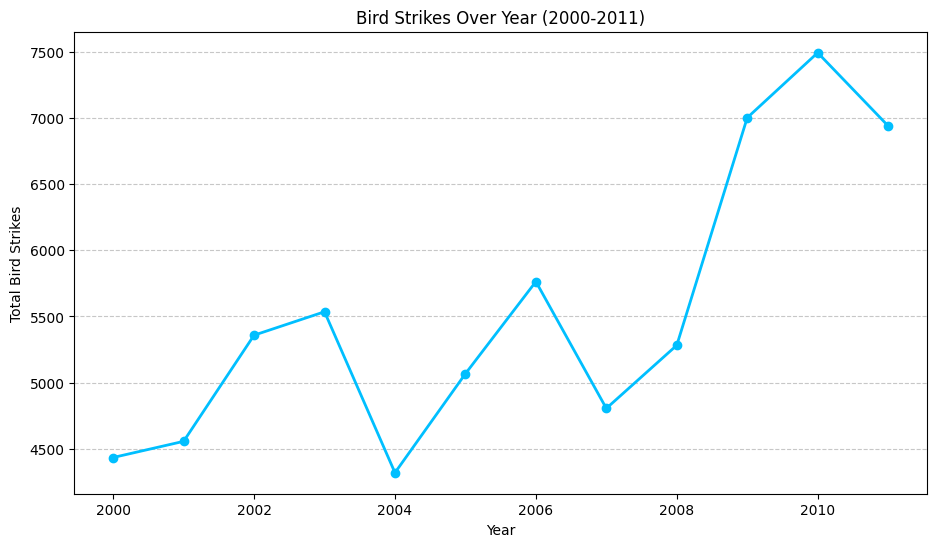

In [130]:
# Extracting the year from the 'FlightDate' column & Grouping by year and counting strikes

yearly_strikes = data1.groupby(data1['FlightDate'].dt.year)['Wildlife: Number Struck Actual'].sum()

plt.figure(figsize=(11, 6))

plt.plot(yearly_strikes.index, yearly_strikes.values, marker='o', color='deepskyblue', linestyle='-', linewidth=2, markersize=6)
plt.xlabel('Year')
plt.ylabel('Total Bird Strikes')
plt.title('Bird Strikes Over Year (2000-2011)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Top 10 US Airlines in terms of having encountered bird strikes**


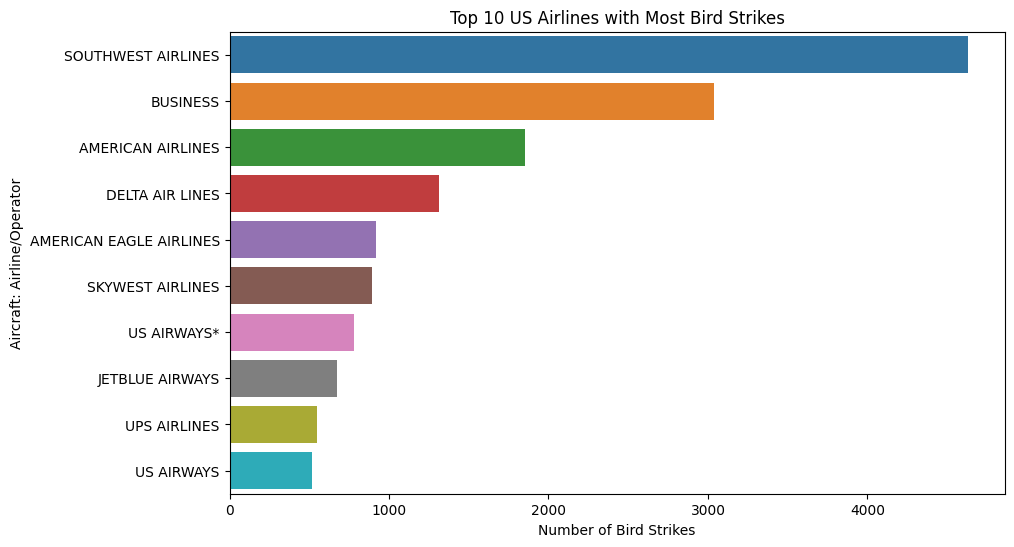

In [81]:
plt.figure(figsize=(10, 6))
top_airlines = data1['Aircraft: Airline/Operator'].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='tab10')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft: Airline/Operator')
plt.show()

**Airports with most incidents of bird strikes – Top 50**

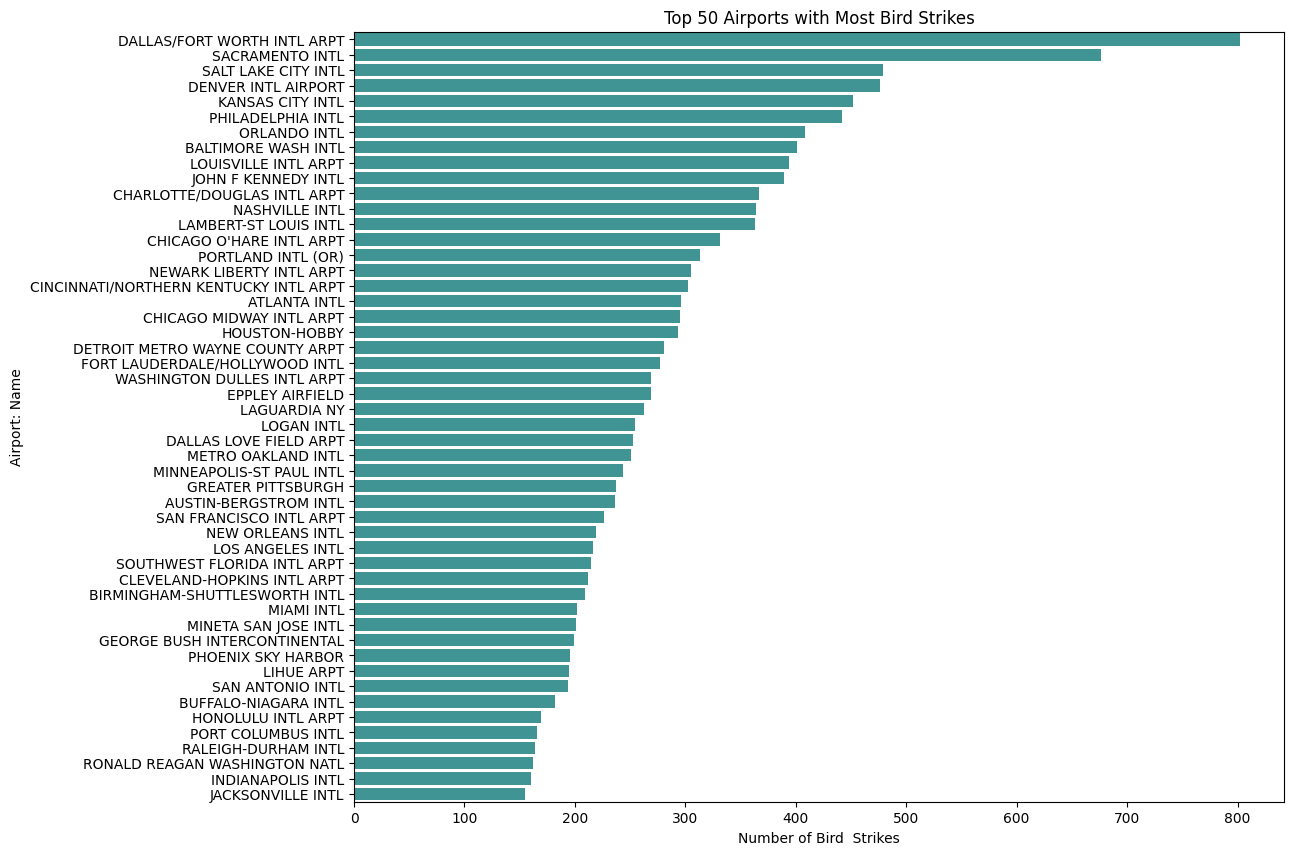

In [131]:
# Count the number of bird strikes per airport
top_airports = data1['Airport: Name'].value_counts().nlargest(50)
plt.figure(figsize=(12,10))
sns.barplot(x=top_airports.values, y=top_airports.index, color = 'darkcyan', alpha=0.8)
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird  Strikes')
plt.ylabel('Airport: Name')
plt.show()

**Yearly Cost Incurred due to Bird Strikes**

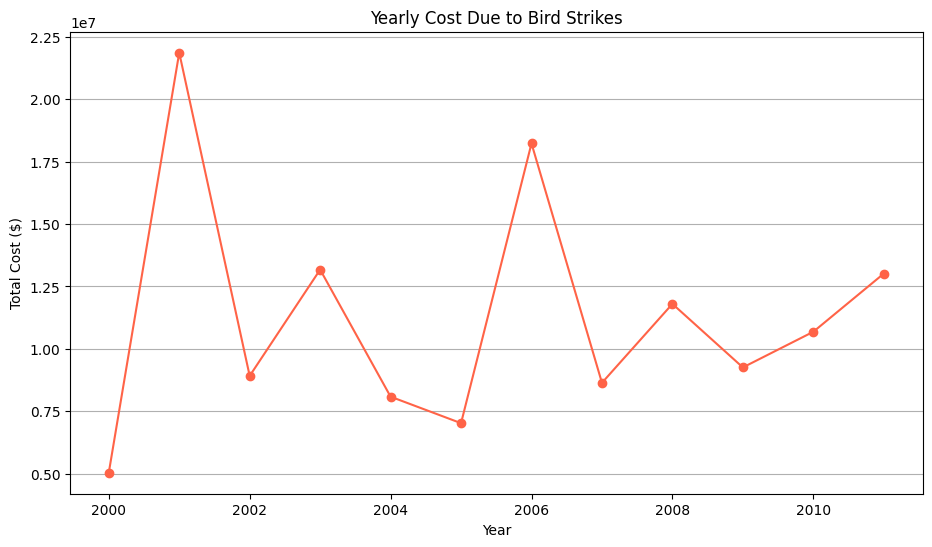

In [132]:
yearly_cost = data1.groupby(data1['FlightDate'].dt.year)['Cost: Total $'].sum()
plt.figure(figsize = (11,6))
yearly_cost.plot(kind='line', marker='o',color='tomato')
plt.title('Yearly Cost Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid( axis = 'y')
plt.show()

**When do most bird strikes occur?**

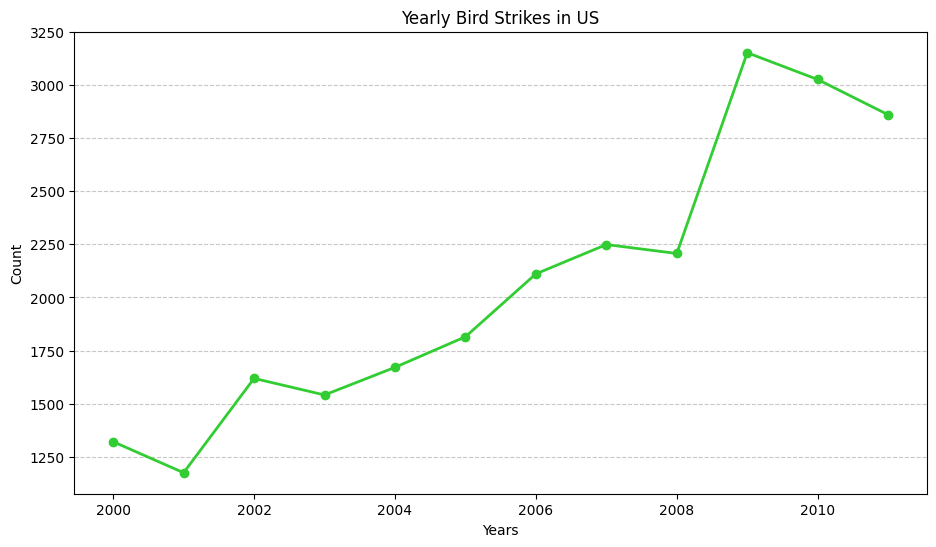

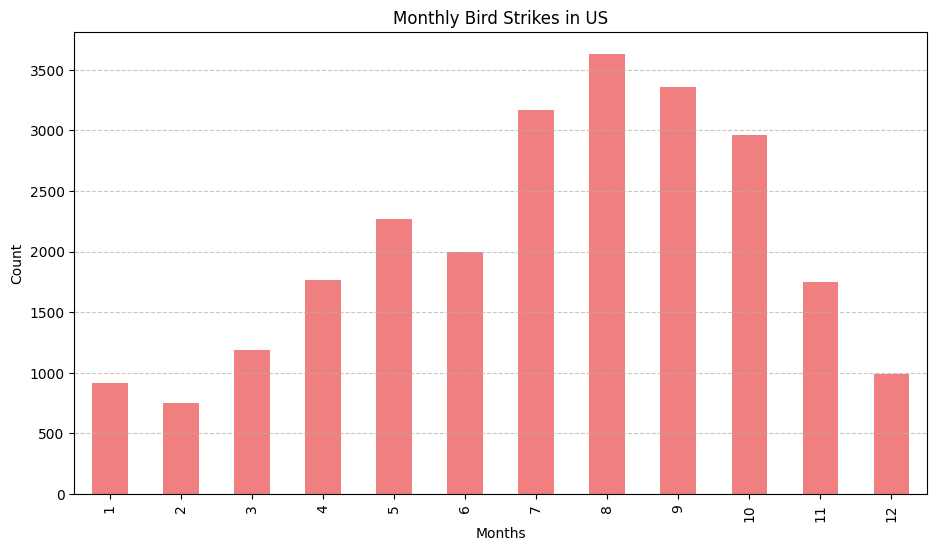

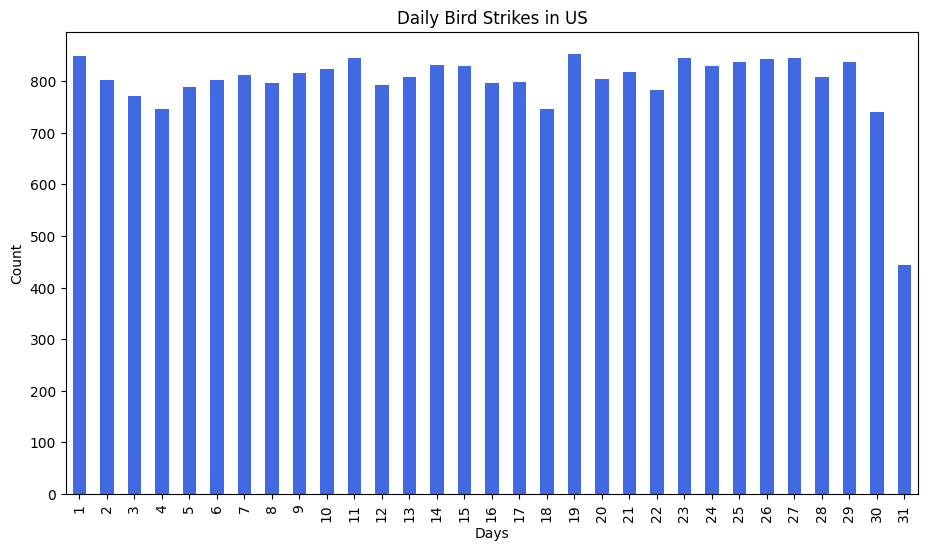

In [129]:
data1['FlightDate'] = pd.to_datetime(data1['FlightDate'])

# Extract Year, Month, and Day
data1['Day'] = data1['FlightDate'].dt.day
data1['Month'] = data1['FlightDate'].dt.month
data1['Year'] = data1['FlightDate'].dt.year

# yearly analysis of bird strikes
plt.figure(figsize=(11, 6))
data1['Year'].value_counts().sort_index().plot(kind='line', color='limegreen', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Yearly Bird Strikes in US')
plt.xlabel('Years')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# monthly analysis of bird strikes
plt.figure(figsize = (11,6))
data1['Month'].value_counts().sort_index().plot(kind='bar', color = 'lightcoral')
plt.title('Monthly Bird Strikes in US')
plt.xlabel('Months')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Daily analysis of bird strikes
plt.figure(figsize = (11,6))
data1['Day'].value_counts().sort_index().plot(kind='bar',color = 'royalblue')
plt.title('Daily Bird Strikes in US')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()


**Altitude of aeroplanes at the time of strike**

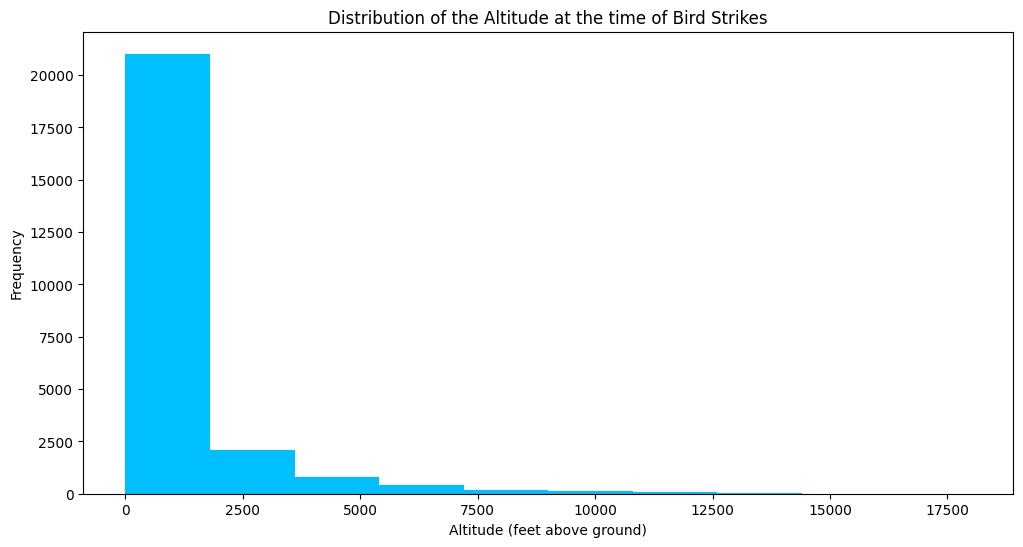

In [115]:
plt.figure(figsize = (12,6))
plt.hist(data1['Feet above ground'], bins=10, color ='deepskyblue')
plt.title('Distribution of the Altitude at the time of Bird Strikes')
plt.xlabel('Altitude (feet above ground)')
plt.ylabel('Frequency')
plt.show()

**Phase of flight at the time of the strike.**

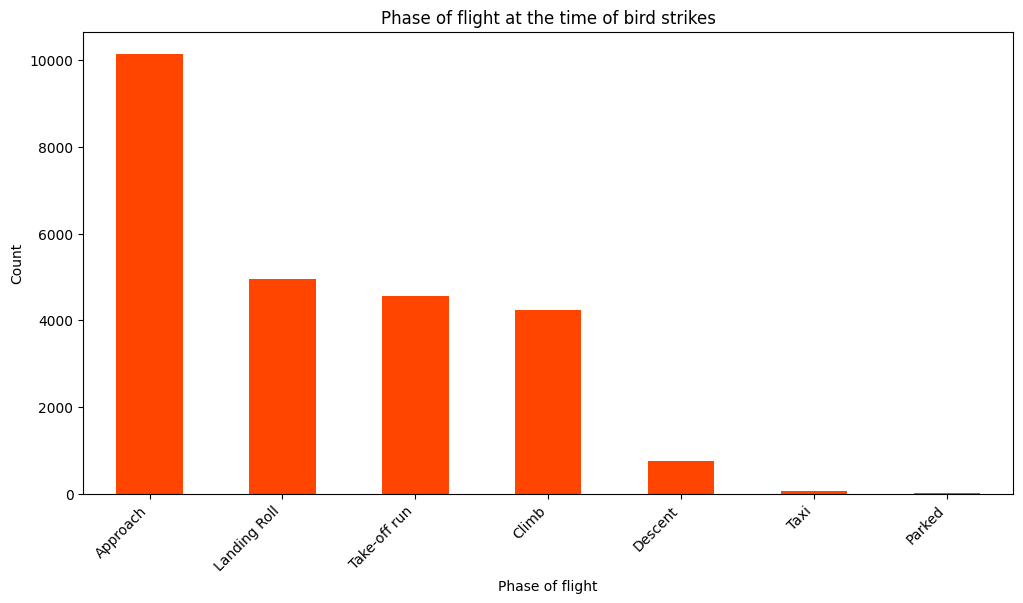

In [114]:
plt.figure(figsize = (12,6))

data1['When: Phase of flight'].value_counts().plot(kind = 'bar', color='orangered')
plt.title('Phase of flight at the time of bird strikes')
plt.xlabel('Phase of flight')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha='right')
plt.show()

**Average Altitude of the aeroplanes in different phases at the time of strike**

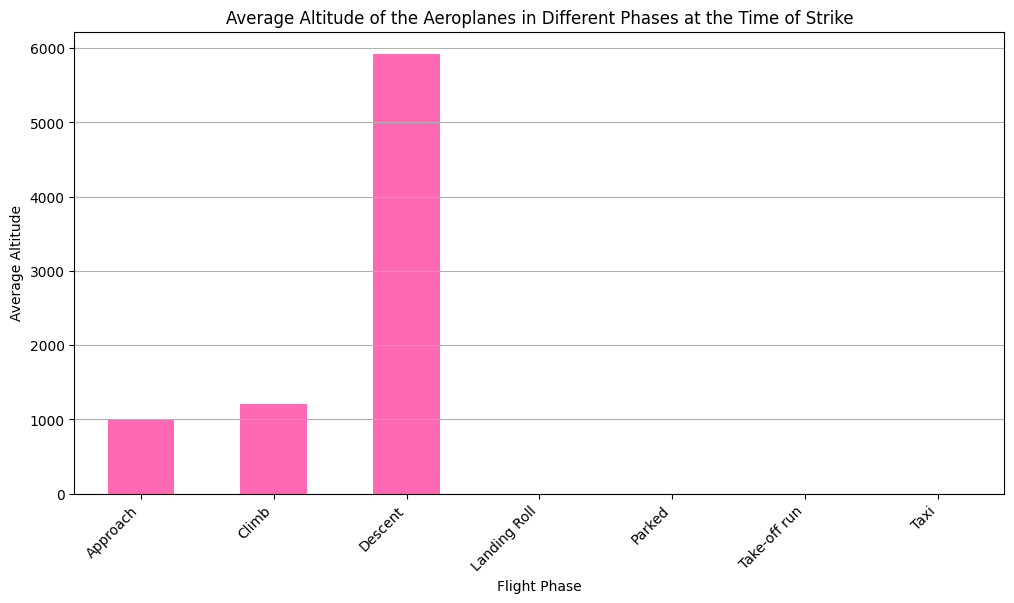

In [112]:
avg_altitude_diff_phase = data1.groupby('When: Phase of flight')['Feet above ground'].mean()
plt.figure(figsize = (12,6))

avg_altitude_diff_phase.plot(kind = 'bar', color = 'hotpink')
plt.title('Average Altitude of the Aeroplanes in Different Phases at the Time of Strike')
plt.xlabel('Flight Phase')
plt.ylabel('Average Altitude')
plt.xticks(rotation=45, ha = 'right')
plt.grid(axis='y')
plt.show()

**Effect of Bird Strikes & Impact on Flight**

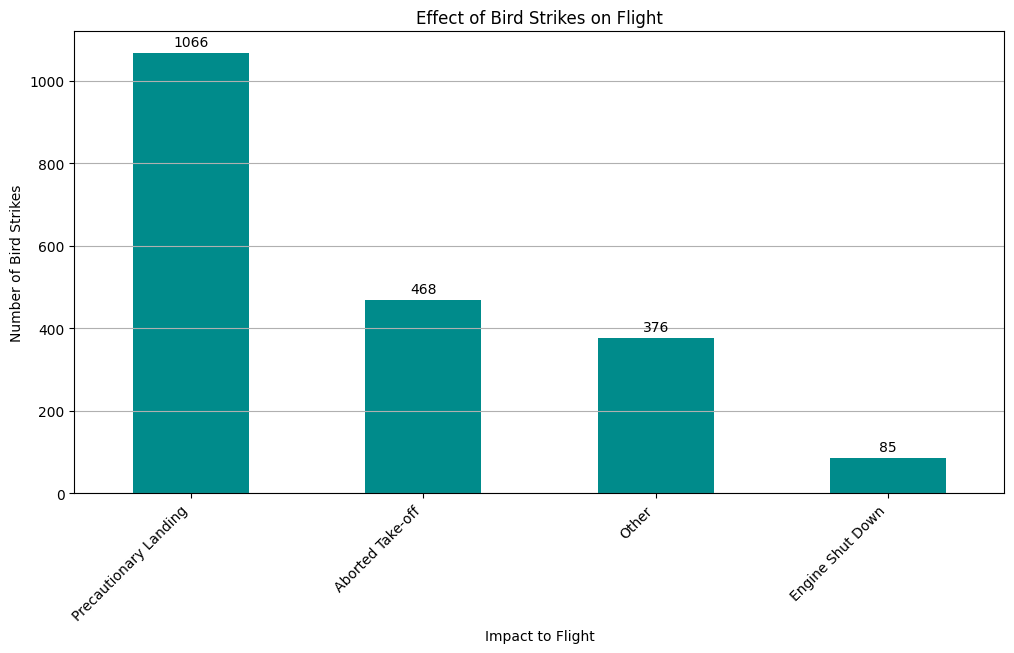

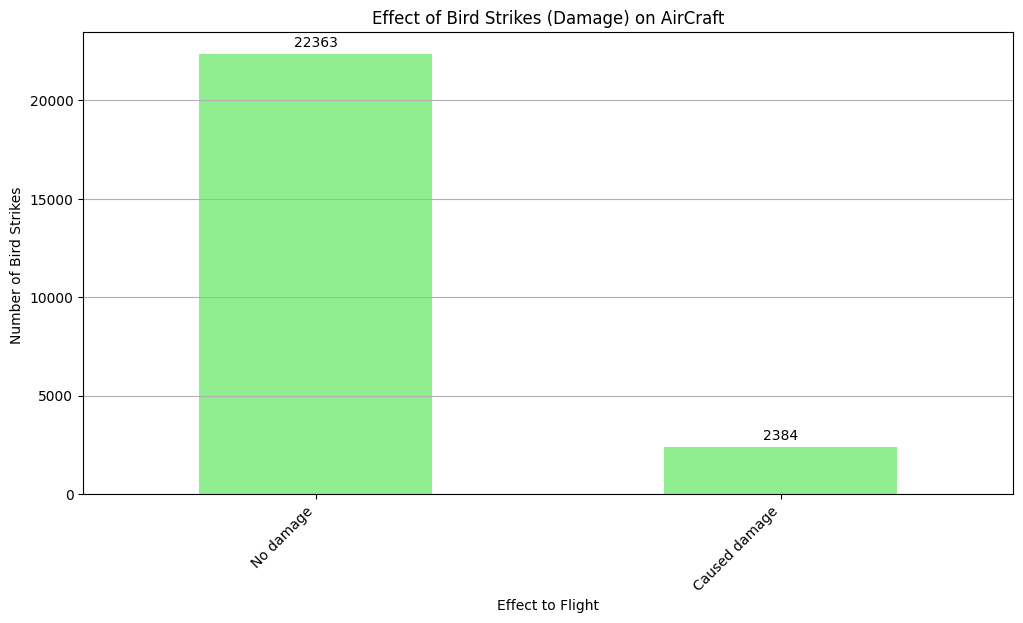

In [133]:
filtered_data = data1[data1['Effect: Impact to flight'].str.strip().str.lower() != 'no impact']

plt.figure(figsize = (12,6))

bars = filtered_data['Effect: Impact to flight'].value_counts().plot(kind='bar', color='darkcyan')

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', xytext=(0, 8),
                  textcoords='offset points')

plt.title('Effect of Bird Strikes on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y')
plt.show()


plt.figure(figsize = (12,6))

bars = data1['Effect: Indicated Damage'].value_counts().plot(kind = 'bar', color = 'lightgreen')

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', xytext=(0, 8),
                  textcoords='offset points')
plt.title('Effect of Bird Strikes (Damage) on AirCraft')
plt.xlabel('Effect to Flight')
plt.ylabel('Number of Bird Strikes ')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y')
plt.show()

**Effect of Strike at Different Altitude**

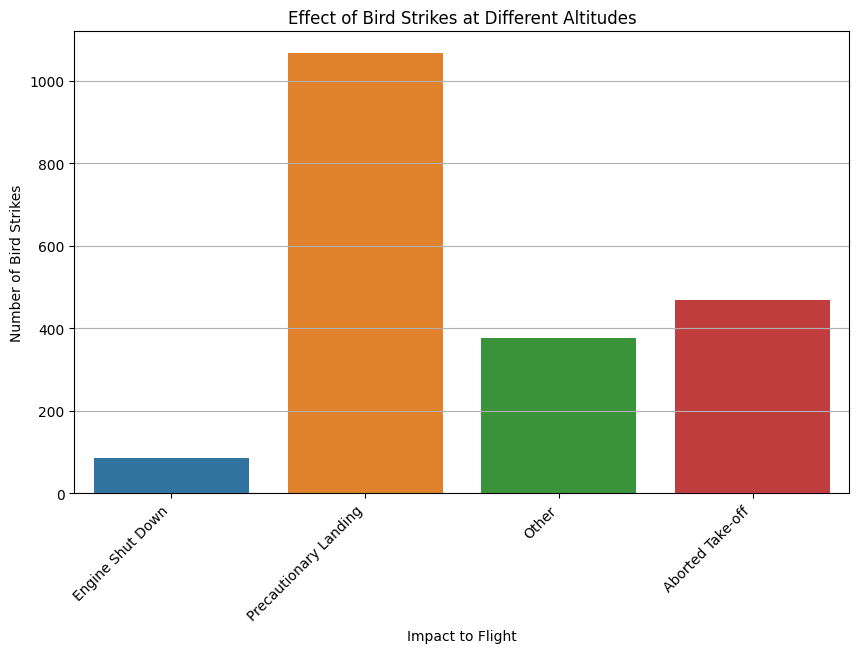

In [106]:
filtered_data = data1[data1['Effect: Impact to flight'].str.strip().str.lower() != 'no impact']


plt.figure(figsize=(10, 6))
sns.countplot(x='Effect: Impact to flight', data=filtered_data, palette='tab10')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Were Pilots Informed? & Prior Warning and Effect of Strike Relation**

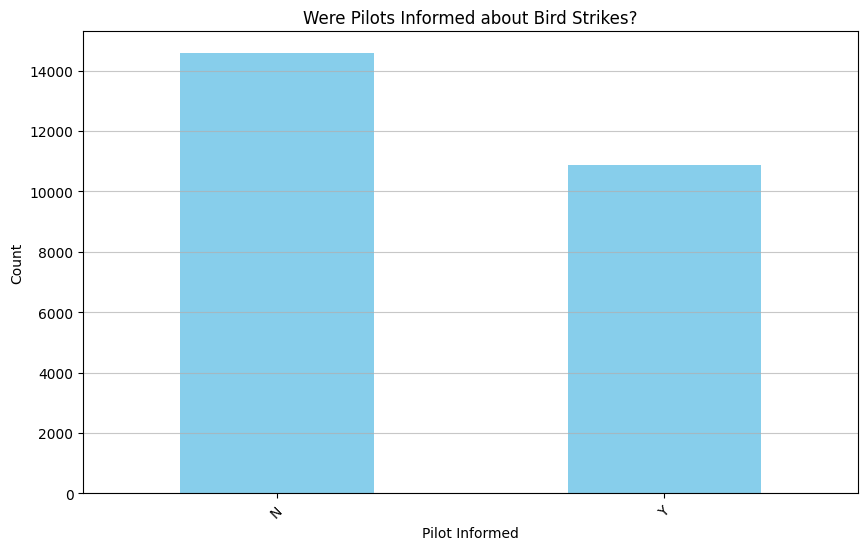

In [125]:
plt.figure(figsize=(10, 6))
data['Pilot warned of birds or wildlife?'].value_counts().plot(kind='bar', color = 'skyblue')
plt.title('Were Pilots Informed about Bird Strikes?')
plt.xlabel('Pilot Informed')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.grid(axis='y',alpha=0.7)
plt.show()

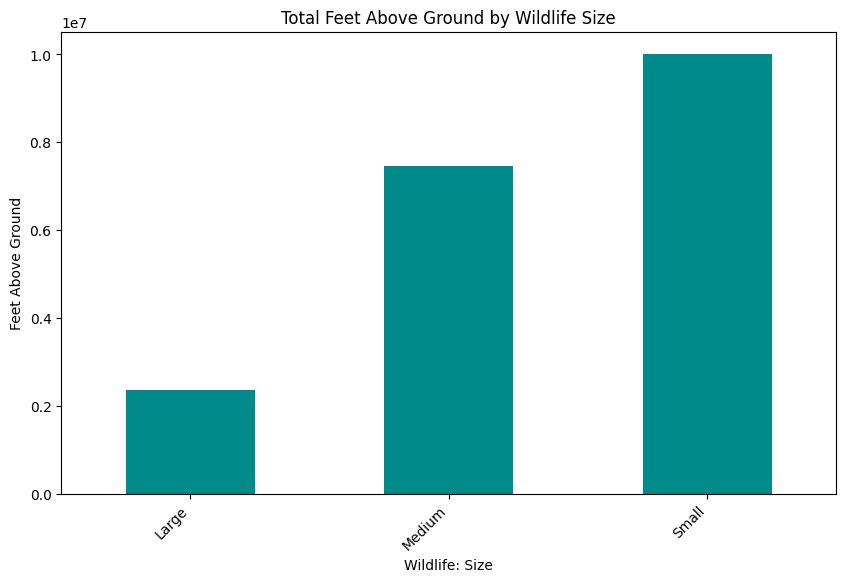

In [134]:
# Group by 'Wildlife: Size' and calculate the mean of 'Feet above the ground'
grouped_data = data1.groupby('Wildlife: Size')['Feet above ground'].sum()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='darkcyan')
plt.xlabel('Wildlife: Size')
plt.ylabel('Feet Above Ground')
plt.title('Total Feet Above Ground by Wildlife Size')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

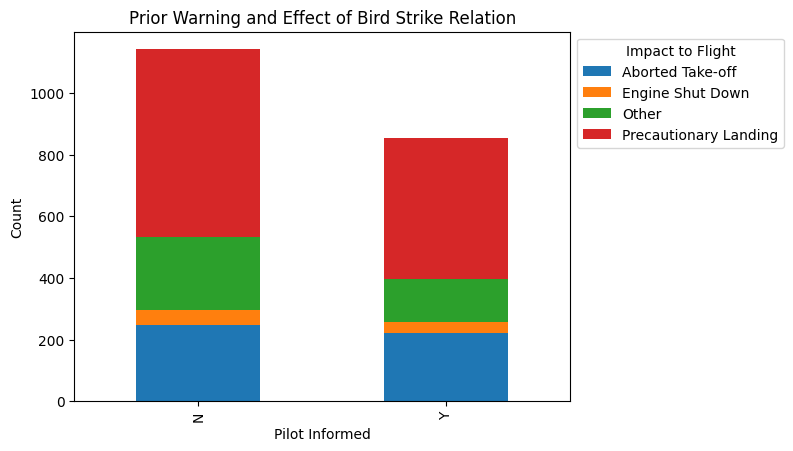

In [73]:
filtered_data = data1[data1['Effect: Impact to flight'].str.strip().str.lower() != 'no impact']

plt.figure(figsize=(10, 6))
filtered_data.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Prior Warning and Effect of Bird Strike Relation')
plt.xlabel('Pilot Informed')
plt.ylabel('Count')
plt.legend(title='Impact to Flight', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [74]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24747 entries, 0 to 25557
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                24747 non-null  int64         
 1   Aircraft: Type                           24747 non-null  object        
 2   Airport: Name                            24747 non-null  object        
 3   Altitude bin                             24747 non-null  object        
 4   Aircraft: Make/Model                     24747 non-null  object        
 5   Wildlife: Number struck                  24747 non-null  object        
 6   Wildlife: Number Struck Actual           24747 non-null  int64         
 7   Effect: Impact to flight                 24747 non-null  object        
 8   FlightDate                               24747 non-null  datetime64[ns]
 9   Effect: Indicated Damage                 247

In [75]:
data1.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Day', 'Month', 'Year'],
      dtype='object')

In [76]:
data1.to_csv('Bird Strikes data.csv')